In [505]:
import pandas as pd 

### Improvment on Data preprocessing

In [506]:
# The first improvment of the group project should be the data preprocessing
raw_df = pd.read_csv("./delhivery_data.csv")
raw_df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [507]:
# for following process the pd.to_datetime's format
raw_df['cutoff_timestamp'][:4]

0           2018-09-20 04:27:55
1           2018-09-20 04:17:55
2    2018-09-20 04:01:19.505586
3           2018-09-20 03:39:57
Name: cutoff_timestamp, dtype: object

In [508]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [509]:
# drop null and dupliacted
raw_df.isnull().sum()
raw_df = raw_df.dropna().drop_duplicates()
raw_df.isnull().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

In [510]:
raw_df.shape

(144316, 24)

In [511]:
# to test the columns to be converted into datetime
for col_name, value in zip(raw_df.columns, raw_df.iloc[0]):
    print(f"{col_name}: {value}")

data: training
trip_creation_time: 2018-09-20 02:35:36.476840
route_schedule_uuid: thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3297ef
route_type: Carting
trip_uuid: trip-153741093647649320
source_center: IND388121AAA
source_name: Anand_VUNagar_DC (Gujarat)
destination_center: IND388620AAB
destination_name: Khambhat_MotvdDPP_D (Gujarat)
od_start_time: 2018-09-20 03:21:32.418600
od_end_time: 2018-09-20 04:47:45.236797
start_scan_to_end_scan: 86.0
is_cutoff: True
cutoff_factor: 9
cutoff_timestamp: 2018-09-20 04:27:55
actual_distance_to_destination: 10.43566024429648
actual_time: 14.0
osrm_time: 11.0
osrm_distance: 11.9653
factor: 1.2727272727272727
segment_actual_time: 14.0
segment_osrm_time: 11.0
segment_osrm_distance: 11.9653
segment_factor: 1.2727272727272727


In [512]:
# convert the type of columns
time_columns = ['trip_creation_time', 'od_start_time', 'od_end_time', 'cutoff_timestamp']
for col in time_columns:
    raw_df[col] = pd.to_datetime(raw_df[col],format='mixed') 
raw_df.isnull().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

In [513]:
# successfully processed
raw_df['cutoff_timestamp'][:4]

0   2018-09-20 04:27:55.000000
1   2018-09-20 04:17:55.000000
2   2018-09-20 04:01:19.505586
3   2018-09-20 03:39:57.000000
Name: cutoff_timestamp, dtype: datetime64[ns]

In [514]:
"""
# According to the introduction on Kaggle, columns' meanings are listed below

• data - tells whether the data is testing or training data
• trip_creation_time – Timestamp of trip creation
• route_schedule_uuid – Unique Id for a particular route schedule
• route_type – Transportation type
• FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
• Carting: Handling system consisting of small vehicles (carts)
• trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
• source_center - Source ID of trip origin
• source_name - Source Name of trip origin
• destination_cente – Destination ID
• destination_name – Destination Name
• od_start_time – Trip start time
• od_end_time – Trip end time
• start_scan_to_end_scan – Time taken to deliver from source to destination
• is_cutoff – Unknown field
• cutoff_factor – Unknown field
• cutoff_timestamp – Unknown field
• actual_distance_to_destination – Distance in Kms between source and destination warehouse
• actual_time – Actual time taken to complete the delivery (Cumulative)
• osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
• osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
• factor – Unknown field
• segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
• segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
• segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
• segment_factor – Unknown field
"""
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetime64[n

In [515]:
# since the data column has the training and testing classgory, then we can divide it into two dataframe
raw_df.data.value_counts()

train_df = raw_df[raw_df.data == 'training']
test_df = raw_df[raw_df.data == 'test']

train_df.shape, test_df.shape

((104632, 24), (39684, 24))

In [516]:
train_df.columns
print(train_df.route_type.value_counts())
print(test_df.route_type.value_counts())
# the the proportion of route type in illustrated in the two categories
# the primary processing of data comes to the end

route_type
FTL        72904
Carting    31728
Name: count, dtype: int64
route_type
FTL        26228
Carting    13456
Name: count, dtype: int64


In [517]:
# The second improvement of the group project should be the visualization
# the former one put all emphasis on the single feature while neglecting the mutual influence among different variables
# and I want to improve that

# starting with the source and destination
Source_dict = dict(train_df['source_center'].value_counts())
Des_dict = dict(train_df['destination_center'].value_counts())
# these are frequency to be sources or destinations
# then the merge of source counts and desination counts is applied, with the first value in the list for souce counts
merged_dict = {}
for key, value in Source_dict.items():
    merged_dict[key] = [value]

for key, value in Des_dict.items():
    if key in merged_dict:
        merged_dict[key].append(value)
    else:
        merged_dict[key] = [0, value]

print(merged_dict)

# convert dict into list
Source_and_des = pd.DataFrame.from_dict(merged_dict, orient='index').reset_index()
Source_and_des.columns = ['CenterID', 'NumAsSource', 'NumAsDes']
Source_and_des


{'IND000000ACB': [16440, 11422], 'IND562132AAA': [7391, 7992], 'IND421302AAG': [6430, 3984], 'IND411033AAA': [3401, 2772], 'IND501359AAE': [2559, 3890], 'IND160002AAC': [1968, 2094], 'IND712311AAA': [1908, 3457], 'IND395023AAA': [1562, 775], 'IND560099AAB': [1475, 1092], 'IND110037AAM': [1375, 2691], 'IND131028AAB': [1370, 2266], 'IND382430AAB': [1316, 1394], 'IND600056AAB': [1293, 1541], 'IND751002AAB': [1154, 2169], 'IND781018AAB': [1137, 456], 'IND560300AAA': [930, 828], 'IND209304AAA': [926, 1436], 'IND462022AAA': [796, 1327], 'IND834002AAB': [763, 719], 'IND854326AAB': [709, 255], 'IND530012AAA': [582, 550], 'IND110044AAB': [578, 84], 'IND000000ACT': [517], 'IND302014AAA': [502, 970], 'IND842001AAA': [482, 810], 'IND400072AAB': [450, 403], 'IND306401AAB': [444, 185], 'IND121004AAB': [425, 446], 'IND416012AAA': [411, 478], 'IND821115AAB': [395, 563], 'IND000000ACA': [393, 368], 'IND413002AAA': [355, 486], 'IND825409AAA': [350, 24], 'IND518002AAA': [350, 351], 'IND403726AAA': [331, 

,CenterID,NumAsSource,NumAsDes
0,IND000000ACB,16440,11422.0
1,IND562132AAA,7391,7992.0
2,IND421302AAG,6430,3984.0
3,IND411033AAA,3401,2772.0
4,IND501359AAE,2559,3890.0
...,...,...,...
1572,IND148024AAB,0,1.0
1573,IND686141AAA,0,1.0
1574,IND636005AAC,0,1.0
1575,IND741316AAA,0,1.0


=======================================================================================================

### Improvment on Visualiztion

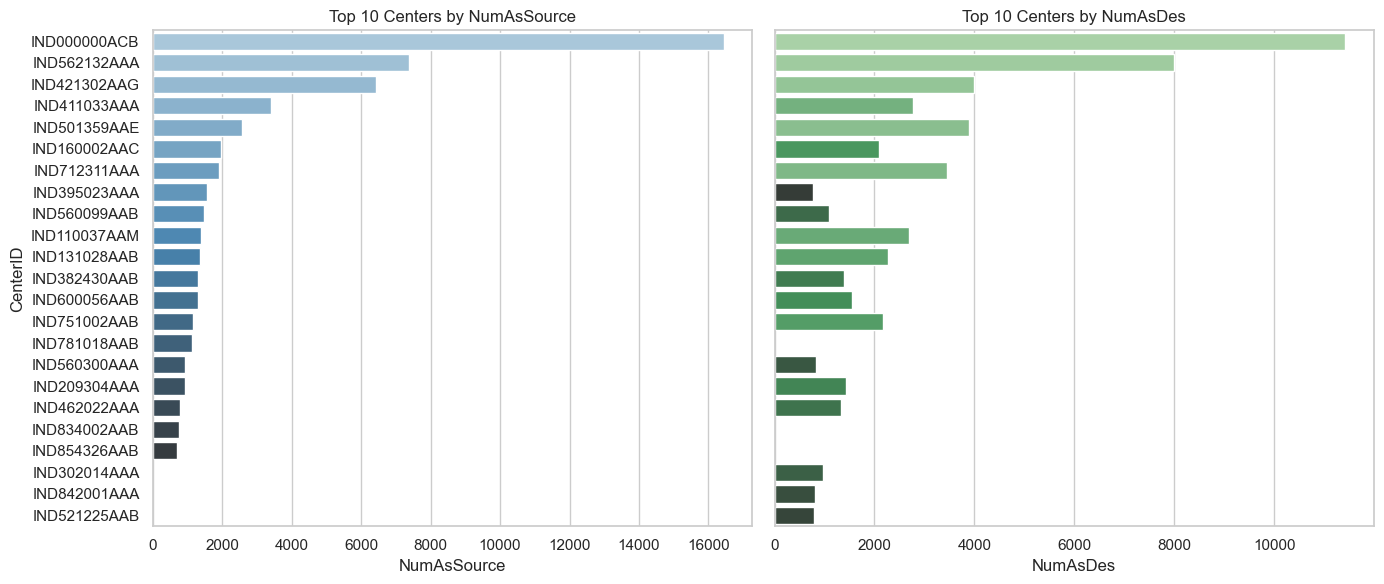

In [518]:
import seaborn as sns
import matplotlib.pyplot as plt

# to better visualize the top source and desination, the top 10s are included in the hist grams
top_source = Source_and_des.nlargest(20, "NumAsSource")
top_des = Source_and_des.nlargest(20, "NumAsDes")

sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.barplot(ax=axes[0], y="CenterID", x="NumAsSource", hue = "CenterID", data=top_source, palette="Blues_d", legend=False)
axes[0].set_title("Top 10 Centers by NumAsSource")
axes[0].set_xlabel("NumAsSource")
axes[0].set_ylabel("CenterID")

sns.barplot(ax=axes[1], y="CenterID", x="NumAsDes", hue = "CenterID", data=top_des, palette="Greens_d", legend=False)
axes[1].set_title("Top 10 Centers by NumAsDes")
axes[1].set_xlabel("NumAsDes")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

In [519]:
Source_and_des.head()
Source_and_des['Average'] = Source_and_des[['NumAsSource', 'NumAsDes']].mean(axis=1)
Source_and_des = Source_and_des.sort_values(by='Average', ascending=False)
Source_and_des
# convert to the descending order according to the mean

,CenterID,NumAsSource,NumAsDes,Average
0,IND000000ACB,16440,11422.0,13931.0
1,IND562132AAA,7391,7992.0,7691.5
2,IND421302AAG,6430,3984.0,5207.0
4,IND501359AAE,2559,3890.0,3224.5
3,IND411033AAA,3401,2772.0,3086.5
...,...,...,...,...
1570,IND733210AAA,0,1.0,0.5
1569,IND000000AFS,0,1.0,0.5
1567,IND250609AAA,0,1.0,0.5
1566,IND110085AAA,0,1.0,0.5


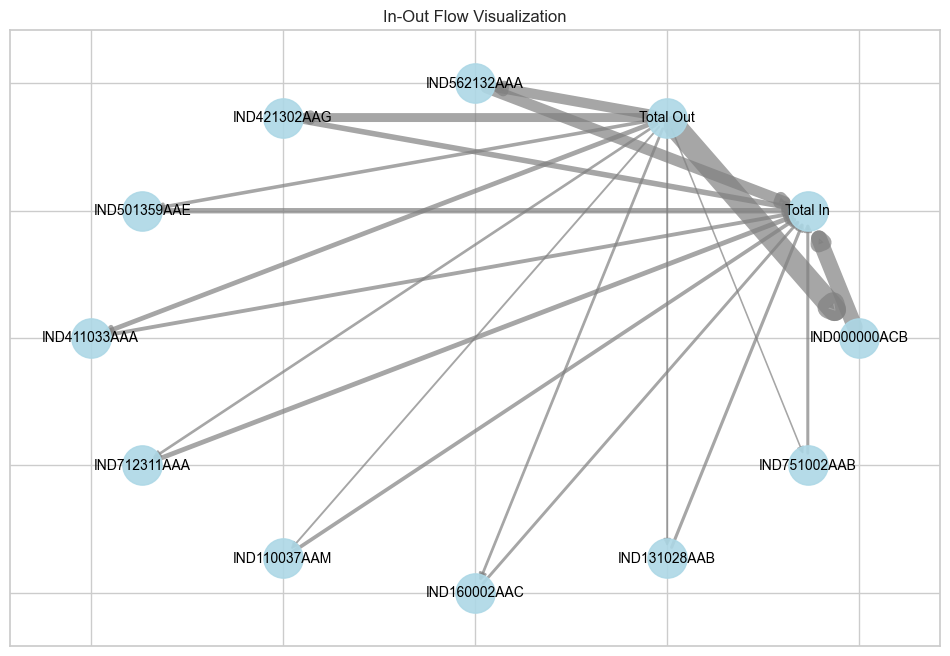

In [520]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# using directed graph to visualize the in-flow and out-flow
G = nx.DiGraph()
# using the totalin and totalout as dummy points
for _, row in Source_and_des[:10].iterrows():
    G.add_node(row['CenterID'], weight=row['NumAsSource'] + row['NumAsDes'])
    G.add_edge(row['CenterID'], 'Total In', weight=row['NumAsDes'])  # Edges for incoming traffic
    G.add_edge('Total Out', row['CenterID'], weight=row['NumAsSource'])  # Edges for outgoing traffic

plt.figure(figsize=(12, 8))
# circular_layout is much clearer
#pos = nx.spring_layout(G, seed=42)
pos = nx.circular_layout(G)
weights = nx.get_edge_attributes(G, 'weight')


nx.draw_networkx_nodes(G, pos, node_size=800, node_color='lightblue', alpha=0.9)
nx.draw_networkx_edges(G, pos, width=[v / 1000 for v in weights.values()], alpha=0.7, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

plt.title('In-Out Flow Visualization')
plt.show()
# this visualization provides limited information, so sankey pic is the alternative

In [521]:
#train_df.info()

import plotly.graph_objects as go
sankey_df = train_df[['source_center', 'destination_center']]
sankey_df
flows = sankey_df.groupby(['source_center', 'destination_center']).size().reset_index(name='value')

flows = flows.drop_duplicates()
flows = flows.head(20)

In [522]:
# the nodes
nodes = list(set(flows['source_center']).union(set(flows['destination_center'])))
node_indices = {node: i for i, node in enumerate(nodes)}

# the flow
flows['source'] = flows['source_center'].map(node_indices)
flows['target'] = flows['destination_center'].map(node_indices)

fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes
    ),
    link=dict(
        source=flows['source'],
        target=flows['target'],
        value=flows['value']
    )
))

fig.update_layout(title_text="Sankey Pic of in-and-out Flows", font_size=10)
fig.show()

# sankey is not ideal as well, but it reveals the extreme imbalanced flows in different nodes
# what if the distribution of burden of in-out flows can influence the delivery time
# the burden of centers can be divided into different the class, and the comparsion of delivert time can be contrasted

<Figure size 1000x600 with 0 Axes>

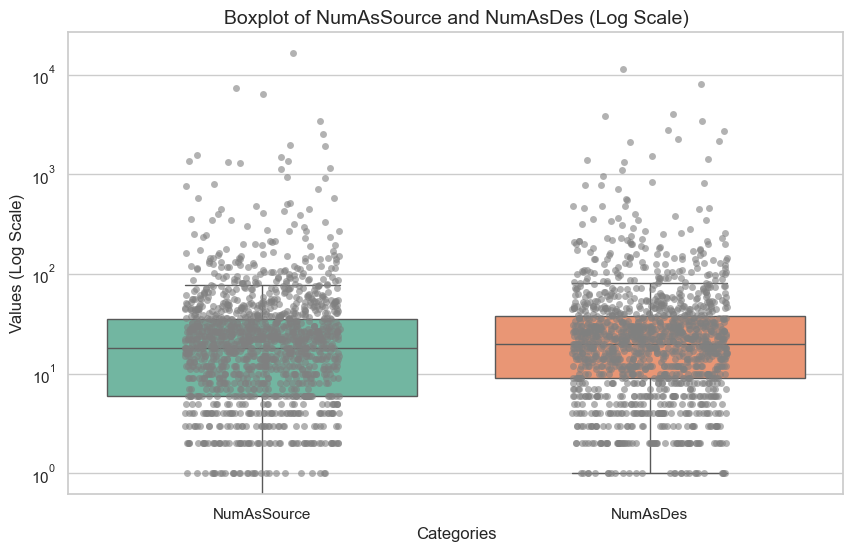

In [523]:
Source_and_des.head()

plt.figure(figsize=(10, 6))

# boxplot in-out burden first
plt.figure(figsize=(10, 6))
sns.boxplot(data=Source_and_des[["NumAsSource", "NumAsDes"]], palette="Set2", showfliers=False)
sns.stripplot(data=Source_and_des[["NumAsSource", "NumAsDes"]], color="grey", alpha=0.6, jitter=0.2)

plt.yscale("log")
plt.title("Boxplot of NumAsSource and NumAsDes (Log Scale)", fontsize=14)
plt.ylabel("Values (Log Scale)", fontsize=12)
plt.xlabel("Categories", fontsize=12)

plt.show()

# percetile seems to be applicable to divide burden

In [524]:
# Calculate percentiles
source_75th = Source_and_des["NumAsSource"].quantile(0.75)
source_25th = Source_and_des["NumAsSource"].quantile(0.25)
destination_75th = Source_and_des["NumAsDes"].quantile(0.75)
destination_25th = Source_and_des["NumAsDes"].quantile(0.25)

# using function to appply
def classify_burden_percentile(value, q25, q75):
    if value > q75:
        return "High"
    elif value >= q25:
        return "Medium"
    else:
        return "Low"

Source_and_des["SourceBurden"] = Source_and_des["NumAsSource"].apply(classify_burden_percentile, args=(source_25th, source_75th))
Source_and_des["DestinationBurden"] = Source_and_des["NumAsDes"].apply(classify_burden_percentile, args=(destination_25th, destination_75th))

print(Source_and_des.SourceBurden.value_counts())
print(Source_and_des.DestinationBurden.value_counts())

SourceBurden
Medium    814
High      388
Low       375
Name: count, dtype: int64
DestinationBurden
Medium    719
Low       510
High      348
Name: count, dtype: int64


In [525]:
# apply burden level into original dataset
train_df.columns

# osrm_time is verified in the group prject, and here we use it to evaluate the delivery time
burden_delivery_relation_df = train_df[['source_center', 'destination_center', 'osrm_time']]
burden_delivery_relation_df


Source_and_des = Source_and_des.drop_duplicates()
#burden_delivery_relation_df = burden_delivery_relation_df.merge(Source_and_des['SourceBurden'], on='source_center', how='right')

Source_and_des

,CenterID,NumAsSource,NumAsDes,Average,SourceBurden,DestinationBurden
0,IND000000ACB,16440,11422.0,13931.0,High,High
1,IND562132AAA,7391,7992.0,7691.5,High,High
2,IND421302AAG,6430,3984.0,5207.0,High,High
4,IND501359AAE,2559,3890.0,3224.5,High,High
3,IND411033AAA,3401,2772.0,3086.5,High,High
...,...,...,...,...,...,...
1570,IND733210AAA,0,1.0,0.5,Low,Low
1569,IND000000AFS,0,1.0,0.5,Low,Low
1567,IND250609AAA,0,1.0,0.5,Low,Low
1566,IND110085AAA,0,1.0,0.5,Low,Low


In [526]:
osrm_source = (
    burden_delivery_relation_df.groupby('source_center')['osrm_time']
    .mean()
    .reset_index()
    .rename(columns={'destination_center': 'centerID', 'osrm_time': 'TimeAsSource'})

)

osrm_des = (
    burden_delivery_relation_df.groupby('destination_center')['osrm_time']
    .mean()
    .reset_index()
    .rename(columns={'destination_center': 'centerID', 'osrm_time': 'TimeAsDes'})
)

osrm_source = pd.concat([osrm_source, osrm_des], axis=1).drop(columns='centerID')
osrm_source.rename(columns={'source_center': 'CenterID'}, inplace=True)
osrm_source.head()
# some centers don't function as destination or source in this dataset

,CenterID,TimeAsSource,TimeAsDes
0,IND000000AAL,21.142857,23.166667
1,IND000000AAS,25.888889,37.708333
2,IND000000AAZ,36.000000,47.833333
3,IND000000ABA,19.800000,25.833333
4,IND000000ABD,201.986111,31.192308


In [527]:
osrm_source.shape
burden_osrm_merge = pd.merge(osrm_source, Source_and_des, on='CenterID', how='left')
burden_osrm_merge
# this df is perfect for visualize the relationship between burden and delivery time 

,CenterID,TimeAsSource,TimeAsDes,NumAsSource,NumAsDes,Average,SourceBurden,DestinationBurden
0,IND000000AAL,21.142857,23.166667,28,30.0,29.0,Medium,Medium
1,IND000000AAS,25.888889,37.708333,18,24.0,21.0,Medium,Medium
2,IND000000AAZ,36.000000,47.833333,6,6.0,6.0,Medium,Low
3,IND000000ABA,19.800000,25.833333,10,30.0,20.0,Medium,Medium
4,IND000000ABD,201.986111,31.192308,144,26.0,85.0,High,Medium
...,...,...,...,...,...,...,...,...
1411,IND854105AAB,46.114286,NaN,35,22.0,28.5,Medium,Medium
1412,IND854311AAA,19.000000,NaN,15,31.0,23.0,Medium,Medium
1413,IND854326AAB,414.420310,NaN,709,255.0,482.0,High,High
1414,IND854334AAA,24.272727,NaN,11,16.0,13.5,Medium,Medium


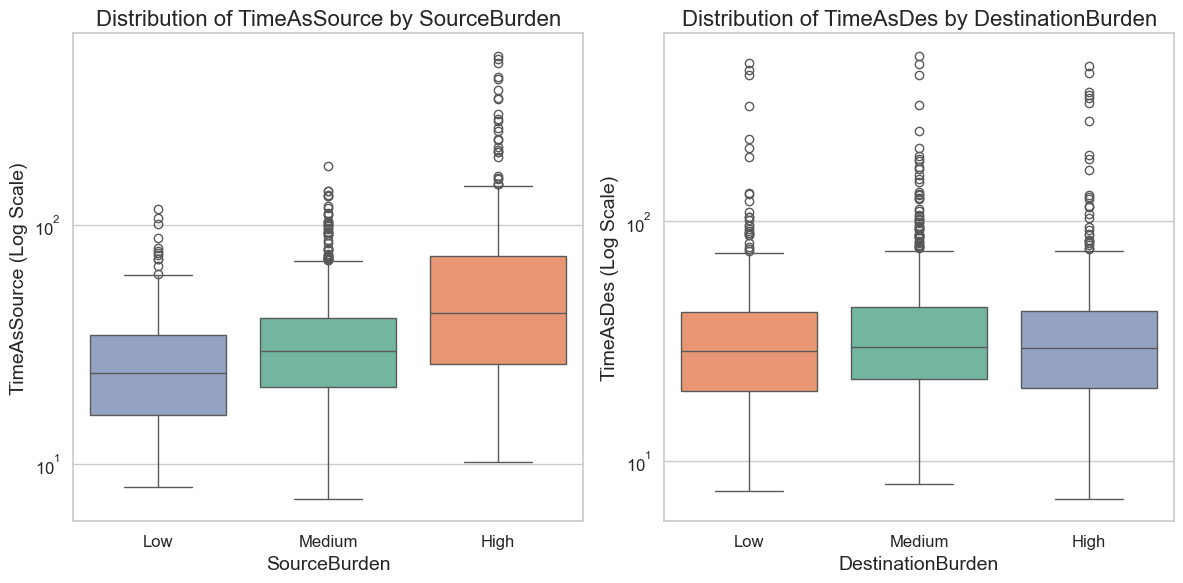

In [528]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True)

# source burden
sns.boxplot(x='SourceBurden', y='TimeAsSource', hue = 'SourceBurden', data=burden_osrm_merge, ax=axes[0], palette="Set2", order = ['Low', 'Medium', 'High'])
axes[0].set_title('Distribution of TimeAsSource by SourceBurden', fontsize=16)
axes[0].set_xlabel('SourceBurden', fontsize=14)
axes[0].set_ylabel('TimeAsSource (Log Scale)', fontsize=14)
axes[0].set_yscale("log")
axes[0].tick_params(axis='both', labelsize=12)

# des burden
sns.boxplot(x='DestinationBurden', y='TimeAsDes', hue = 'DestinationBurden', data=burden_osrm_merge, ax=axes[1], palette="Set2", order = ['Low', 'Medium', 'High'])
axes[1].set_title('Distribution of TimeAsDes by DestinationBurden', fontsize=16)
axes[1].set_xlabel('DestinationBurden', fontsize=14)
axes[1].set_ylabel('TimeAsDes (Log Scale)', fontsize=14)
axes[1].set_yscale("log")
axes[1].tick_params(axis='both', labelsize=12)


plt.tight_layout()
plt.show()

# Obviously, the effect is more significant when center functions as source
# As a result, this is the feature worth analyzing

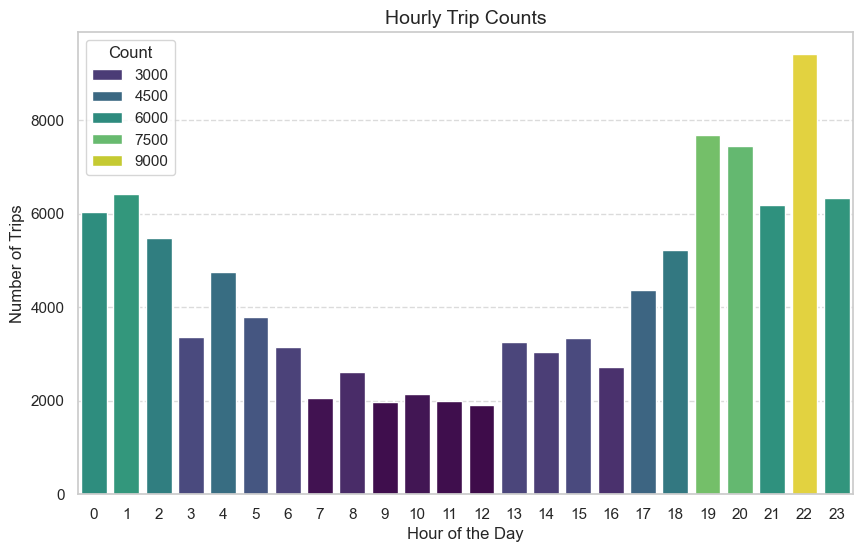

In [529]:
# conclusion can be reached that the main sources are the major desinations as well
# then it comes to the time 

train_df['trip_creation_time'].dt.month.value_counts()
# only september is included
Sep_day_counts = train_df['trip_creation_time'].dt.day.value_counts().sort_index()
# only from Sep.12 to Sep.26
# the pattern should be found in more detailed time
Sep_day_counts
hourly_counts = train_df['trip_creation_time'].dt.hour.value_counts().sort_index()
hourly_counts 

hourly_counts_df = hourly_counts.reset_index()
hourly_counts_df.columns = ['Hour', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Hour', y='Count', hue = 'Count', data=hourly_counts_df, palette='viridis')
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.title('Hourly Trip Counts', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
# it reveals a interesting trend that more trips was created beyound noon, and we can divided into three categories: busy, medium, and spare

In [530]:
train_df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [531]:
# Also, another things need to be varified is the duration of every trip
# in the group assign, models are utilized to verify the most crediable from osrm, actual, and segment
# but with more detailed dataset, other methods can be applied to verify this thing
duration_from_various = ['actual_time', 'osrm_time', 'segment_actual_time', 'segment_osrm_time']
Duration_test_df = train_df[time_columns + duration_from_various ]

Duration_test_df['From_Creation_To_end'] = (Duration_test_df['od_end_time'] - Duration_test_df['trip_creation_time']).dt.total_seconds() / 60
Duration_test_df['From_Creation_To_cutoff'] = (Duration_test_df['cutoff_timestamp'] - Duration_test_df['trip_creation_time']).dt.total_seconds() / 60
Duration_test_df['From_Start_To_end'] = (Duration_test_df['od_end_time'] - Duration_test_df['od_start_time']).dt.total_seconds() / 60
Duration_test_df['From_Start_To_cutoff'] = (Duration_test_df['cutoff_timestamp'] - Duration_test_df['od_start_time']).dt.total_seconds() / 60


/var/folders/8t/3xrvdszj1g75llc2jb40dnvw0000gn/T/ipykernel_29806/2340368982.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/8t/3xrvdszj1g75llc2jb40dnvw0000gn/T/ipykernel_29806/2340368982.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/8t/3xrvdszj1g75llc2jb40dnvw0000gn/T/ipykernel_29806/2340368982.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [532]:
Duration_test_df
# However, no pattern can be from the comparison of time duration, which should be a failure attemption
# but these can be used as the model in the next model construction section

,trip_creation_time,od_start_time,od_end_time,cutoff_timestamp,actual_time,osrm_time,segment_actual_time,segment_osrm_time,From_Creation_To_end,From_Creation_To_cutoff,From_Start_To_end,From_Start_To_cutoff
0,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 04:27:55.000000,14.0,11.0,14.0,11.0,132.145999,112.308719,86.213637,66.376357
1,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 04:17:55.000000,24.0,20.0,10.0,9.0,132.145999,102.308719,86.213637,56.376357
2,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 04:01:19.505586,40.0,28.0,16.0,7.0,132.145999,85.717146,86.213637,39.784783
3,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 03:39:57.000000,62.0,40.0,21.0,12.0,132.145999,64.342053,86.213637,18.409690
4,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 03:33:55.000000,68.0,44.0,6.0,5.0,132.145999,58.308719,86.213637,12.376357
...,...,...,...,...,...,...,...,...,...,...,...,...
144862,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,2018-09-20 21:57:20.000000,94.0,60.0,12.0,12.0,427.686364,332.859396,427.686364,332.859396
144863,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,2018-09-20 21:31:18.000000,120.0,76.0,26.0,21.0,427.686364,306.826063,427.686364,306.826063
144864,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,2018-09-20 21:11:18.000000,140.0,88.0,20.0,34.0,427.686364,286.826063,427.686364,286.826063
144865,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,2018-09-20 20:53:19.000000,158.0,98.0,17.0,27.0,427.686364,268.842729,427.686364,268.842729


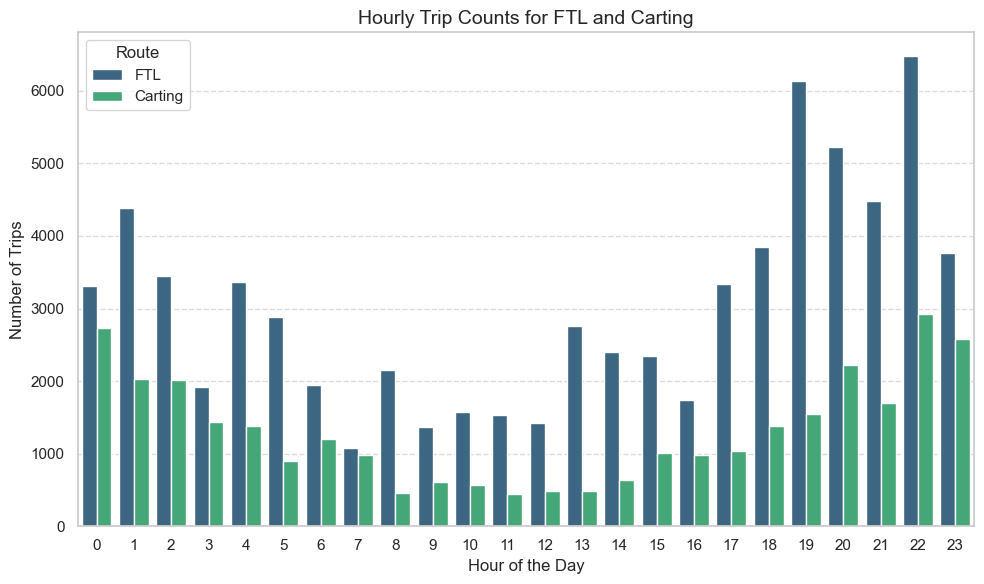

In [533]:
train_df.describe()
train_df.columns
# route_type can also be visualized align with creation time
hourly_counts_withRouteTyoe = train_df[['trip_creation_time', 'route_type']]
hourly_counts_forFTL = train_df[train_df.route_type == 'FTL']['trip_creation_time'].dt.hour.value_counts().sort_index()
hourly_counts_forCarting = train_df[train_df.route_type == 'Carting']['trip_creation_time'].dt.hour.value_counts().sort_index()
#train_df.route_type.value_counts(0)
#hourly_counts_forFTL

hourly_counts_df = pd.DataFrame({
    'Hour': list(hourly_counts_forFTL.index) + list(hourly_counts_forCarting.index),
    'Count': list(hourly_counts_forFTL.values) + list(hourly_counts_forCarting.values),
    'Route': ['FTL'] * len(hourly_counts_forFTL) + ['Carting'] * len(hourly_counts_forCarting)
})


plt.figure(figsize=(10, 6))

sns.barplot(x='Hour', y='Count', hue='Route', data=hourly_counts_df, palette='viridis')

plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.title('Hourly Trip Counts for FTL and Carting', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
# it reveals that the overall trend in two transportation are the same but FTL is generally more popular than Catering

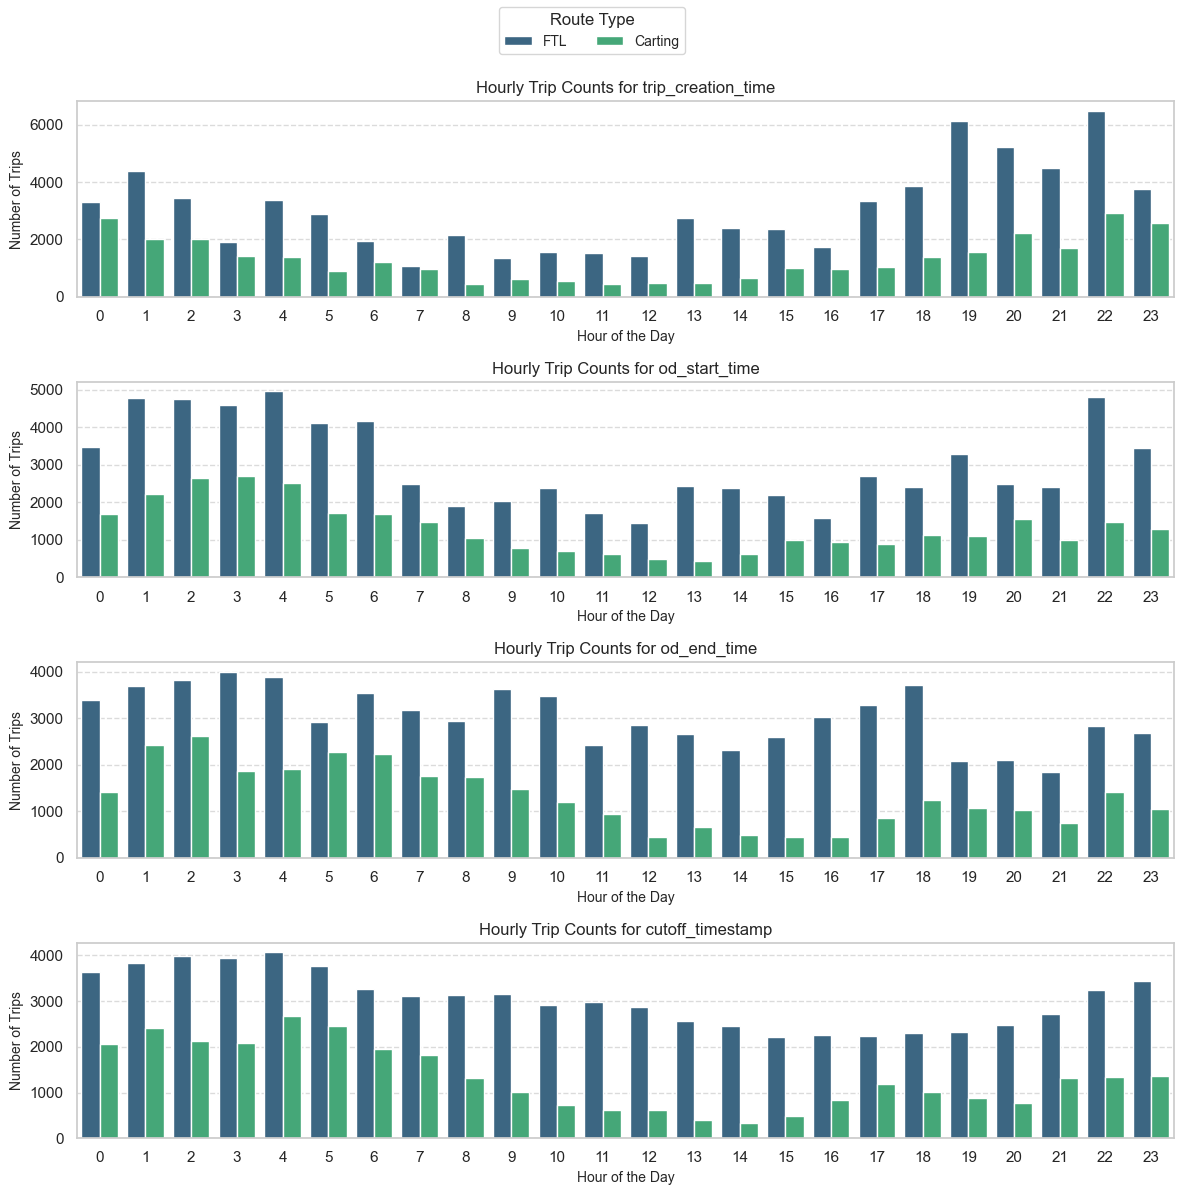

In [534]:
# time_columns = ['trip_creation_time', 'od_start_time', 'od_end_time', 'cutoff_timestamp']
# since we have 4 timestamp columns, why not create subplot to verified the pattern

def four_TimeStamp_toDict(TimeCol_):
    hourly_counts_withRouteTyoe = train_df[[TimeCol_, 'route_type']]
    hourly_counts_forFTL = train_df[train_df.route_type == 'FTL'][TimeCol_].dt.hour.value_counts().sort_index()
    hourly_counts_forCarting = train_df[train_df.route_type == 'Carting'][TimeCol_].dt.hour.value_counts().sort_index()

    hourly_counts_df = pd.DataFrame({
        'Hour': list(hourly_counts_forFTL.index) + list(hourly_counts_forCarting.index),
        'Count': list(hourly_counts_forFTL.values) + list(hourly_counts_forCarting.values),
        'Route': ['FTL'] * len(hourly_counts_forFTL) + ['Carting'] * len(hourly_counts_forCarting)
    })

    return hourly_counts_df
"""
for TimeCol_ in time_columns:
    print(four_TimeStamp_toDict(TimeCol_))
"""

fig, axes = plt.subplots(4, 1, figsize=(12, 12))
axes = axes.flatten()
for idx, TimeCol_ in enumerate(time_columns):
    hourly_counts_df = four_TimeStamp_toDict(TimeCol_)
    ax = axes[idx]
    sns.barplot(
        x='Hour', y='Count', hue='Route', data=hourly_counts_df, palette='viridis', ax=ax
    )
    ax.set_title(f'Hourly Trip Counts for {TimeCol_}', fontsize=12)
    ax.set_xlabel('Hour of the Day', fontsize=10)
    ax.set_ylabel('Number of Trips', fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.legend_.remove()

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, fontsize=10, title='Route Type')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# As shown below, the pattern is widely available

=======================================================================================================

### Improvement on Machine Learning

In [535]:
# during this ssction, simple models will be utilized instead of ensembles or techniques like clustering and PCA for the fluency of runing code when marking
# Besides, since the objective of this report is to demonstrate proficiency in Python and R, the precsion or accuracy of algorithms is not the priority
# Aslo, the models' objective is still to predict the delivery time, and the y is osrm based on the anlysis from group project

# The first process in this part is the creation of new features, acording to analysis before, the focus is the HOUR and BURDEN of center as the source
train_df.columns
# these are the variables I suppose vital to the quality of quality
essential_columns_forTraining = ['trip_creation_time', 'route_type', 'source_center', 'osrm_distance', 'osrm_time']
# These are the ones unkown for function
uncertain_columns_forTraining = [ col_ for col_ in train_df.columns.to_list() if col_ not in essential_columns_forTraining]
uncertain_columns_forTraining 

['data',
 'route_schedule_uuid',
 'trip_uuid',
 'source_name',
 'destination_center',
 'destination_name',
 'od_start_time',
 'od_end_time',
 'start_scan_to_end_scan',
 'is_cutoff',
 'cutoff_factor',
 'cutoff_timestamp',
 'actual_distance_to_destination',
 'actual_time',
 'factor',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance',
 'segment_factor']

In [536]:
# extract the essential to test the regression performance
essential_train_df = train_df[essential_columns_forTraining]
essential_train_df.head()

,trip_creation_time,route_type,source_center,osrm_distance,osrm_time
0,2018-09-20 02:35:36.476840,Carting,IND388121AAA,11.9653,11.0
1,2018-09-20 02:35:36.476840,Carting,IND388121AAA,21.7243,20.0
2,2018-09-20 02:35:36.476840,Carting,IND388121AAA,32.5395,28.0
3,2018-09-20 02:35:36.476840,Carting,IND388121AAA,45.5620,40.0
4,2018-09-20 02:35:36.476840,Carting,IND388121AAA,54.2181,44.0


In [537]:
essential_train_df.info()
essential_train_df['trip_creation_time'] = essential_train_df['trip_creation_time'].dt.hour
essential_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104632 entries, 0 to 144866
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   trip_creation_time  104632 non-null  datetime64[ns]
 1   route_type          104632 non-null  object        
 2   source_center       104632 non-null  object        
 3   osrm_distance       104632 non-null  float64       
 4   osrm_time           104632 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 4.8+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 104632 entries, 0 to 144866
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_creation_time  104632 non-null  int32  
 1   route_type          104632 non-null  object 
 2   source_center       104632 non-null  object 
 3   osrm_distance       104632 non-null  float64
 4   osrm_time      

/var/folders/8t/3xrvdszj1g75llc2jb40dnvw0000gn/T/ipykernel_29806/1524755795.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [538]:
essential_train_df.head()
# since regression will treat hour like int32, so I won't classified it like the source burden
essential_train_df['trip_creation_time'].value_counts()
essential_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104632 entries, 0 to 144866
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_creation_time  104632 non-null  int32  
 1   route_type          104632 non-null  object 
 2   source_center       104632 non-null  object 
 3   osrm_distance       104632 non-null  float64
 4   osrm_time           104632 non-null  float64
dtypes: float64(2), int32(1), object(2)
memory usage: 4.4+ MB


In [539]:
Tobemerged_burden = burden_osrm_merge.copy()
# merge the burden with the train dataset
Tobemerged_burden.rename(columns={'CenterID':'source_center'}, inplace=True)
Tobemerged_burden = Tobemerged_burden[['source_center', 'SourceBurden']]
Tobemerged_burden
essential_train_df = pd.merge(essential_train_df, Tobemerged_burden, on='source_center', how='right')
essential_train_df.head()

,trip_creation_time,route_type,source_center,osrm_distance,osrm_time,SourceBurden
0,13,Carting,IND000000AAL,12.8596,12.0,Medium
1,13,Carting,IND000000AAL,23.9993,25.0,Medium
2,13,Carting,IND000000AAL,15.0486,17.0,Medium
3,13,Carting,IND000000AAL,26.8539,32.0,Medium
4,12,Carting,IND000000AAL,12.9390,11.0,Medium


In [540]:
essential_train_df['SourceBurden'].value_counts()
# no null, which means the successful merge

SourceBurden
High      89041
Medium    14960
Low         631
Name: count, dtype: int64

In [541]:
essential_train_df.columns
essential_train_df = essential_train_df.drop(columns='source_center', axis=1)
# essential converting dummies
essential_train_df = pd.get_dummies(essential_train_df, columns=['route_type', 'SourceBurden'])
essential_train_df

,trip_creation_time,osrm_distance,osrm_time,route_type_Carting,route_type_FTL,SourceBurden_High,SourceBurden_Low,SourceBurden_Medium
0,13,12.8596,12.0,True,False,False,False,True
1,13,23.9993,25.0,True,False,False,False,True
2,13,15.0486,17.0,True,False,False,False,True
3,13,26.8539,32.0,True,False,False,False,True
4,12,12.9390,11.0,True,False,False,False,True
...,...,...,...,...,...,...,...,...
104627,20,29.7326,20.0,False,True,False,False,True
104628,20,23.9570,17.0,False,True,False,False,True
104629,20,30.1111,21.0,False,True,False,False,True
104630,19,25.5329,18.0,False,True,False,False,True


In [542]:
# and it comes to the first training and evaluation of training data set
import numpy as np
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.linear_model import LinearRegression, HuberRegressor, BayesianRidge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

class RegressionClass:
    def __init__(self, tested_df):
        self.df_ = tested_df

    # return dataset
    def get_dataset(self,df_):
        X = df_.drop(columns='osrm_time', axis=1).to_numpy()
        y = df_['osrm_time'].to_numpy()
        return X,y

    # dict the models
    def get_models(self):
        models = dict()
        models['linear'] = LinearRegression()
        models['huber'] = HuberRegressor() 
        models['bayesian'] = BayesianRidge()
        models['elasticnet'] = ElasticNet()
        models['knn'] = KNeighborsRegressor()
        models['cart'] = DecisionTreeRegressor()
        return models

    # cross-validation: k-fold
    def evaluate_model(self, model, X, y):
        cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        return scores

    def regression_main(self):
        X, y = self.get_dataset(self.df_)
        models = self.get_models()
        results, names = [], []
        for name, model in models.items():
            scores = self.evaluate_model(model, X, y)
            results.append(scores)
            names.append(name)
        results_dict = dict(zip(names, results))
        results_df = pd.DataFrame(results_dict)
        return results_df

regression_on_train = RegressionClass(essential_train_df)
regression_df = regression_on_train.regression_main()

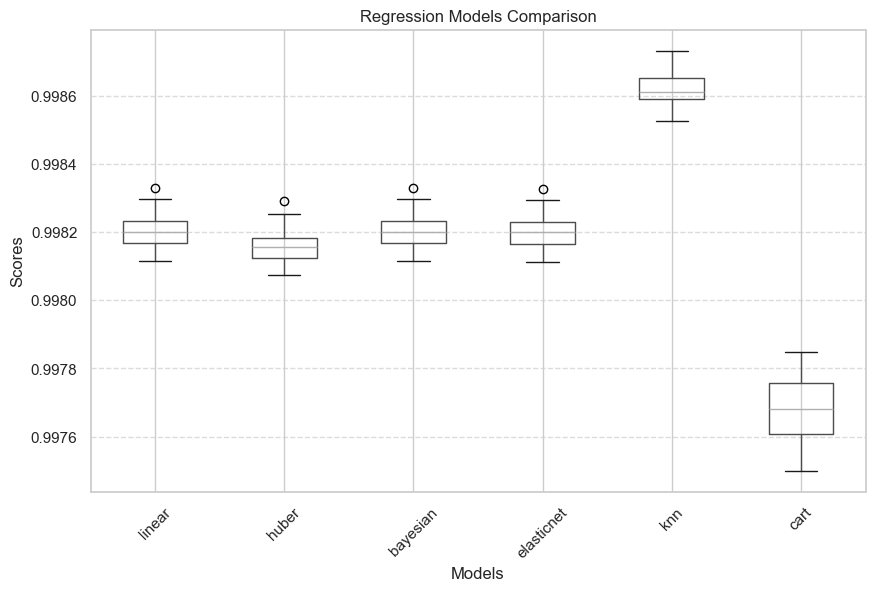

In [543]:
# boxplot the result_df
plt.figure(figsize=(10, 6))
regression_df.boxplot()
plt.title("Regression Models Comparison")
plt.ylabel("Scores")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
# improvement can be observed, also knn works best among algorithms

In [544]:
# since we have make regression on the train dataset and receive ideal performace, testing dataset should also be tried
class FormatDataset:
    def __init__(self,df_):
        self.raw_df = df_

    def essential_info_extractor(self):
        return_df = self.raw_df[['source_center','trip_creation_time','osrm_distance', 'osrm_time' ,'route_type']]
        return_df['trip_creation_time'] = pd.to_datetime(return_df['trip_creation_time'])
        return_df['trip_creation_time'] = return_df['trip_creation_time'].dt.hour
        return_df = return_df.dropna(axis=1)
        self.raw_df = return_df

    def feature_creation(self):
        return_df = pd.merge(self.raw_df, Tobemerged_burden, on='source_center', how='right')
        return_df = return_df.drop(columns='source_center', axis=1)
        #return return_df
        self.raw_df = return_df

    def get_dummies(self):
        return_df = pd.get_dummies(self.raw_df, columns=['route_type', 'SourceBurden'])
        #return return_df
        self.raw_df = return_df
    
    def get_result(self):
        self.essential_info_extractor()
        self.feature_creation()
        self.get_dummies()
        return self.raw_df
    
Format_ = FormatDataset(test_df)
Tobetested_testDF = Format_.get_result()
Tobetested_testDF

/var/folders/8t/3xrvdszj1g75llc2jb40dnvw0000gn/T/ipykernel_29806/242748963.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/8t/3xrvdszj1g75llc2jb40dnvw0000gn/T/ipykernel_29806/242748963.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,trip_creation_time,osrm_distance,osrm_time,route_type_Carting,route_type_FTL,SourceBurden_High,SourceBurden_Low,SourceBurden_Medium
0,13.0,26.7634,31.0,True,False,False,False,True
1,13.0,27.3589,28.0,True,False,False,False,True
2,13.0,27.3589,28.0,True,False,False,False,True
3,18.0,23.5367,25.0,True,False,False,False,True
4,18.0,26.8534,32.0,True,False,False,False,True
...,...,...,...,...,...,...,...,...
39431,20.0,24.9240,17.0,False,True,False,False,True
39432,19.0,23.8999,16.0,False,True,False,False,True
39433,20.0,25.2568,17.0,False,True,False,False,True
39434,19.0,25.5307,18.0,False,True,False,False,True


In [545]:
Tobetested_testDF.isnull().sum()
Tobetested_testDF = Tobetested_testDF.dropna()
Tobetested_testDF.isnull().sum()

trip_creation_time     0
osrm_distance          0
osrm_time              0
route_type_Carting     0
route_type_FTL         0
SourceBurden_High      0
SourceBurden_Low       0
SourceBurden_Medium    0
dtype: int64

In [546]:
regression_on_test = RegressionClass(Tobetested_testDF)
regression_df_test = regression_on_test.regression_main()

<Axes: >

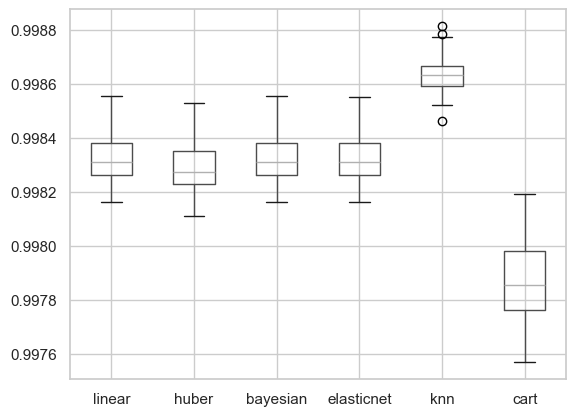

In [547]:
regression_df_test.boxplot()
# the performance is silimar with the training dataset, representing the robortness

In [548]:
# That's the end of the improvments, but I'll attempt to use R to reach the same performance although I'm not so familar with R